In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
# Loading dataset
data = pd.read_excel('Satisfaction_Pro.xlsx')

In [35]:
data.shape

(129880, 23)

In [3]:
### Splitting into target and features
X = data.drop(['satisfaction','Gender','Gate location','Departure Delay in Minutes'], axis=1)
y = data['satisfaction']
# split into train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
# model training Random Forest
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)
# finding accuracy
rf_acc_ws = accuracy_score(y_test, y_pred_rf)

In [5]:
# Finding accuracy
print("Accuracy score", rf_acc_ws)

Accuracy score 0.9550739143825069


In [6]:
X.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,0,56,1,1,1,4,2,4,3,4,3,3,1,5,3,3,4,3,1
1,0,49,1,1,0,4,2,1,2,1,3,2,1,1,4,4,3,2,1
2,0,55,1,1,0,4,3,4,3,4,3,3,3,5,3,2,3,3,1
3,0,36,1,1,0,4,4,4,4,4,4,4,5,4,5,5,5,4,1
4,0,55,1,1,1,4,5,4,3,5,3,3,3,4,5,3,4,3,1


In [7]:
X.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Arrival Delay in Minutes'],
      dtype='object')

In [8]:
#Saving model using pickle
pickle.dump(rf_clf, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load( open('model.pkl','rb'))

print(model.predict([[0,56,1,0,2000,3,4,5,2,3,4,3,3,3,3,3,3,4,0]]))

[0]


In [9]:
surveys =['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness']

In [10]:
surveys

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [11]:
a = np.array([1,3,55,6,7,7,8])

In [12]:
a.shape[0]

7

In [13]:
rf_clf.feature_importances_

array([0.03771041, 0.04825459, 0.08025875, 0.10820542, 0.00848754,
       0.14854923, 0.03211844, 0.03136235, 0.01405395, 0.1992159 ,
       0.04337058, 0.05578364, 0.02850455, 0.04707693, 0.0312333 ,
       0.02837886, 0.0275703 , 0.02316921, 0.00669606])

In [14]:
import matplotlib.pyplot as plt

<BarContainer object of 19 artists>

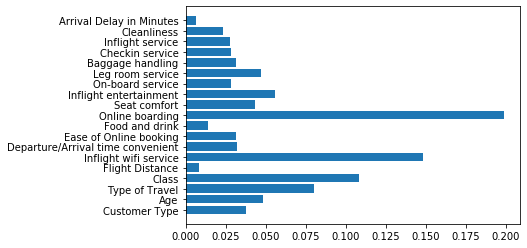

In [15]:
plt.barh(X.columns, rf_clf.feature_importances_)

In [16]:
from sklearn.metrics import precision_score,recall_score

In [17]:
# finding precision
rf_pr = precision_score(y_test, y_pred_rf)


In [18]:
# finding recall
rf_rs = recall_score(y_test, y_pred_rf)

In [19]:
summary = pd.DataFrame([[rf_acc_ws],[rf_pr],[rf_rs]],index=['Accuracy Score','Precision Score','Recall Score'], columns=['Score'])
summary

,Score
Accuracy Score,0.955074
Precision Score,0.960399
Recall Score,0.935558


In [23]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix \n',confusion_matrix(y_test, y_pred_rf) )

Confusion Matrix 
 [[14211   437]
 [  730 10598]]


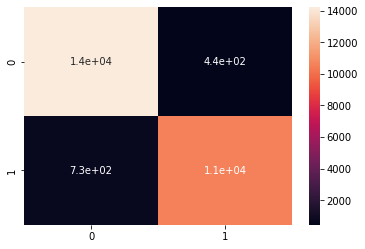

In [25]:
import seaborn as sns

sns.heatmap(cf_matrix, annot=True) 
plt.show()

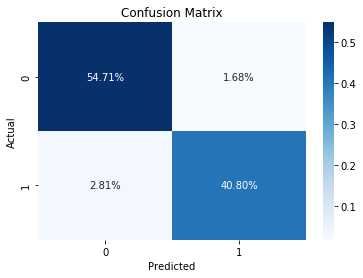

In [38]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


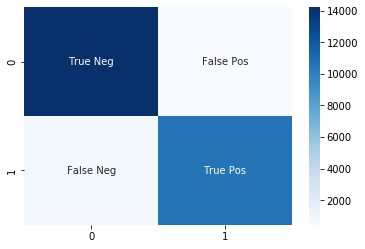

In [34]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()